# Statistical Analysis Of House Prices Data
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Data Science Course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.options.display.max_rows = 1000
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/Users/mohammad/Desktop/Projects/First-Assignment-Statistical-Analysis/train.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# Remove duplicates and remove non_predictive features
data.drop_duplicates(inplace=True)
data.drop(['Id'], axis=1, inplace=True)
data.shape

(1460, 80)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [6]:
for col in data.columns:
    if data[col].isna().sum() > 1000:
        data.drop(columns=[col], inplace=True)

In [7]:
quantitative = [col for col in data.columns if data.dtypes[col] != 'object']
qualitative = [col for col in data.columns if data.dtypes[col] == 'object']
quantitative.remove('SalePrice')
print(quantitative)
print()
print(qualitative)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Pav

In [8]:
for col in quantitative:
    if data[col].isnull().any():
        data[col].fillna(data[col].median(), inplace=True)
        print(f'Missing Value of {col} filled')
        
for col in qualitative:
    if data[col].isnull().any():
        data[col].fillna(data[col].mode()[0], inplace=True)
        print(f'Missing Value of {col} filled')

Missing Value of LotFrontage filled
Missing Value of MasVnrArea filled
Missing Value of GarageYrBlt filled
Missing Value of MasVnrType filled
Missing Value of BsmtQual filled
Missing Value of BsmtCond filled
Missing Value of BsmtExposure filled
Missing Value of BsmtFinType1 filled
Missing Value of BsmtFinType2 filled
Missing Value of Electrical filled
Missing Value of FireplaceQu filled
Missing Value of GarageType filled
Missing Value of GarageFinish filled
Missing Value of GarageQual filled
Missing Value of GarageCond filled


In [9]:
data.shape

(1460, 76)

In [10]:
data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [11]:
data.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBa

In [12]:
data.describe().T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      69.863699     22.027677     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     103.117123    180.731373      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1460.0    1978.589041     23.997022   1900.0    1962.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      79.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     164.25    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

In [13]:
def percentile_trimming_outlier(data):
    drop_outliers = np.array([])
    for col in quantitative:
        upper_bound = data[col].quantile(0.99)
        lower_bound = data[col].quantile(0.01)

        df = data[col]
        indices = df[(df < lower_bound) | (df > upper_bound)].index
        drop_outliers = np.append(drop_outliers, indices)
    return drop_outliers

In [14]:
# Delete Outlier with percetile method
trim_data = data.copy()
drop = percentile_trimming_outlier(trim_data)
dropped = np.unique(drop)
trim_data.drop(dropped, inplace=True)
trim_data.shape

(1190, 76)

## Exploratory Data Analysis (EDA)

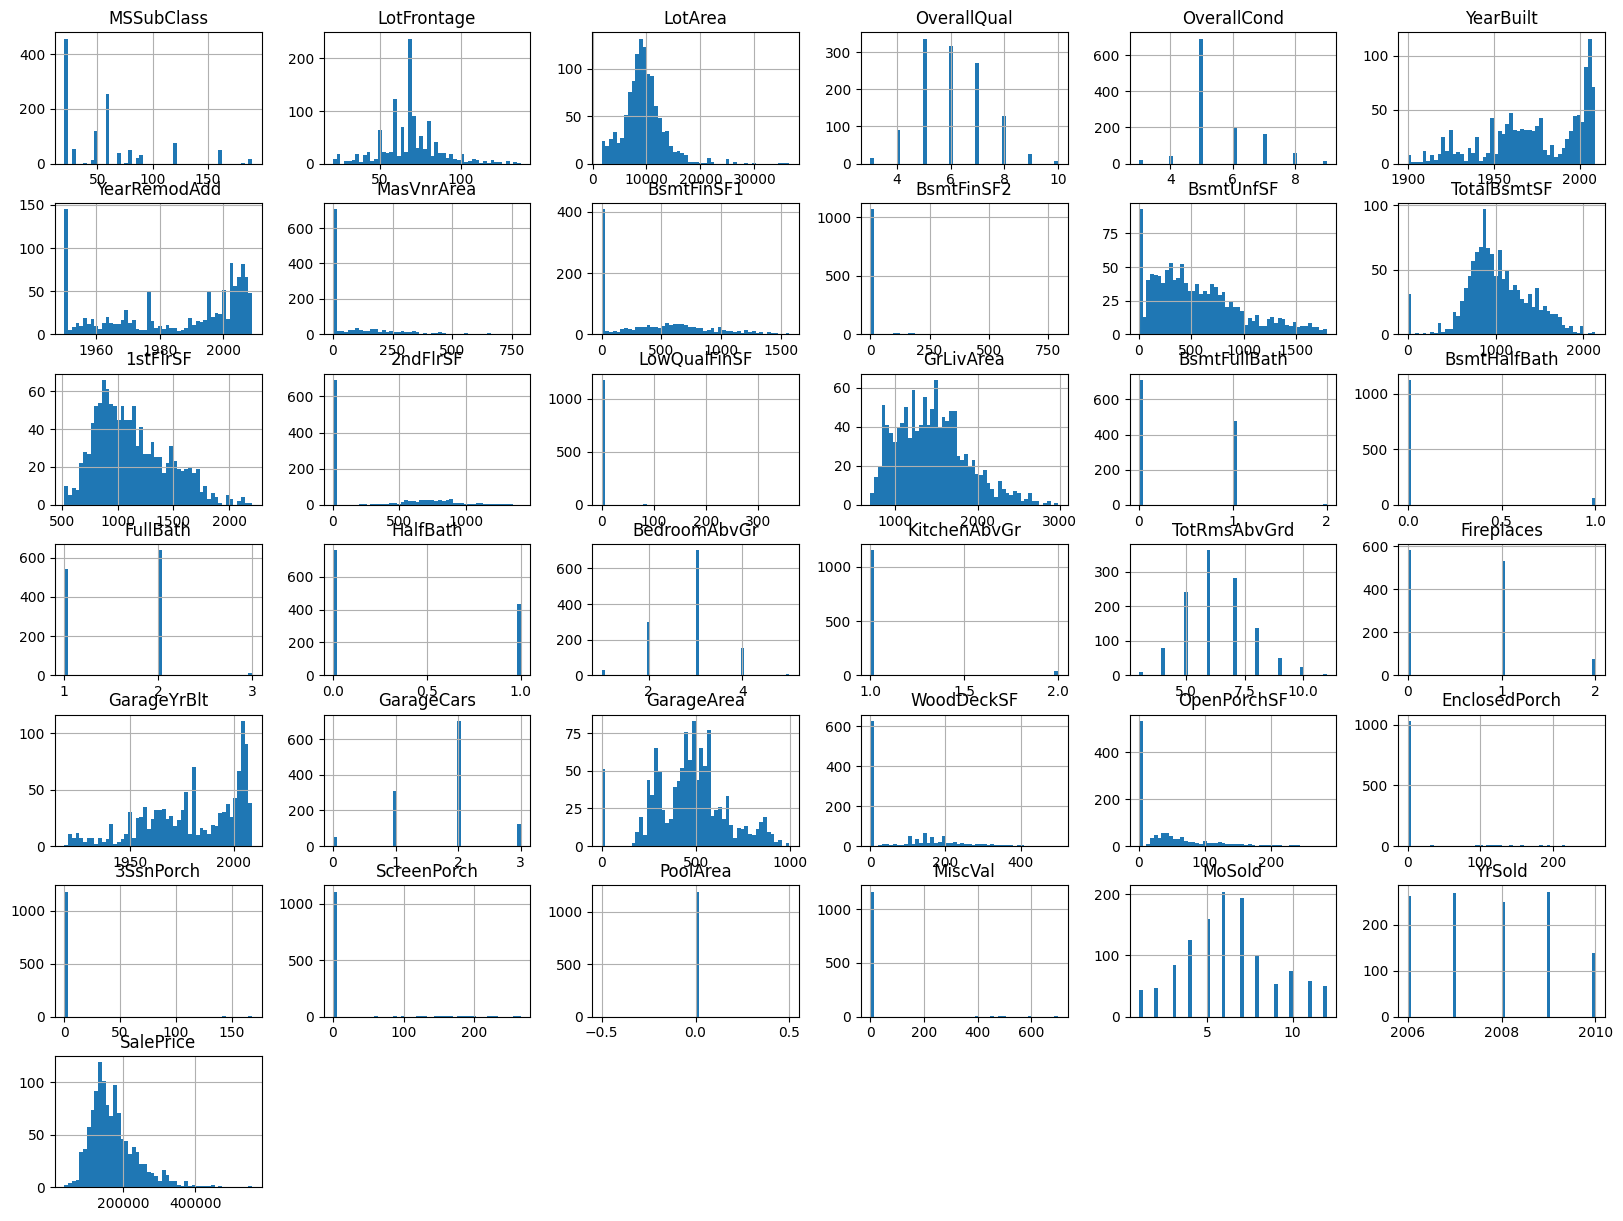

In [15]:
trim_data.hist(bins=50, figsize=(20, 15))
plt.show()

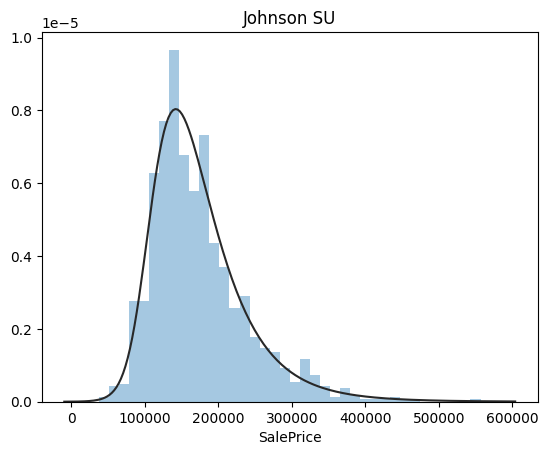

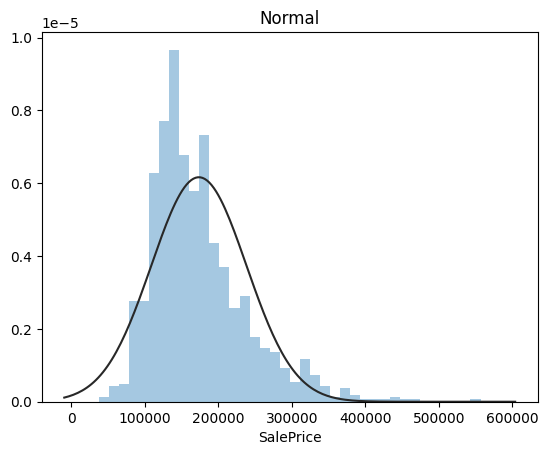

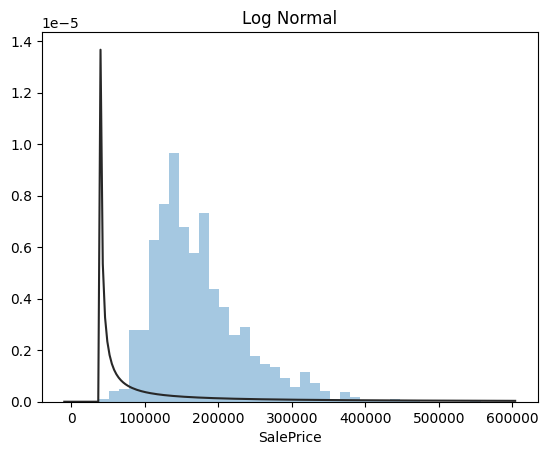

In [16]:
y = trim_data['SalePrice']
plt.figure(1); plt.title('Johnson SU');
sns.distplot(y, kde=False, fit=stats.johnsonsu);
plt.figure(2); plt.title('Normal');
sns.distplot(y, kde=False, fit=stats.norm);
plt.figure(3); plt.title('Log Normal');
sns.distplot(y, kde=False, fit=stats.lognorm);

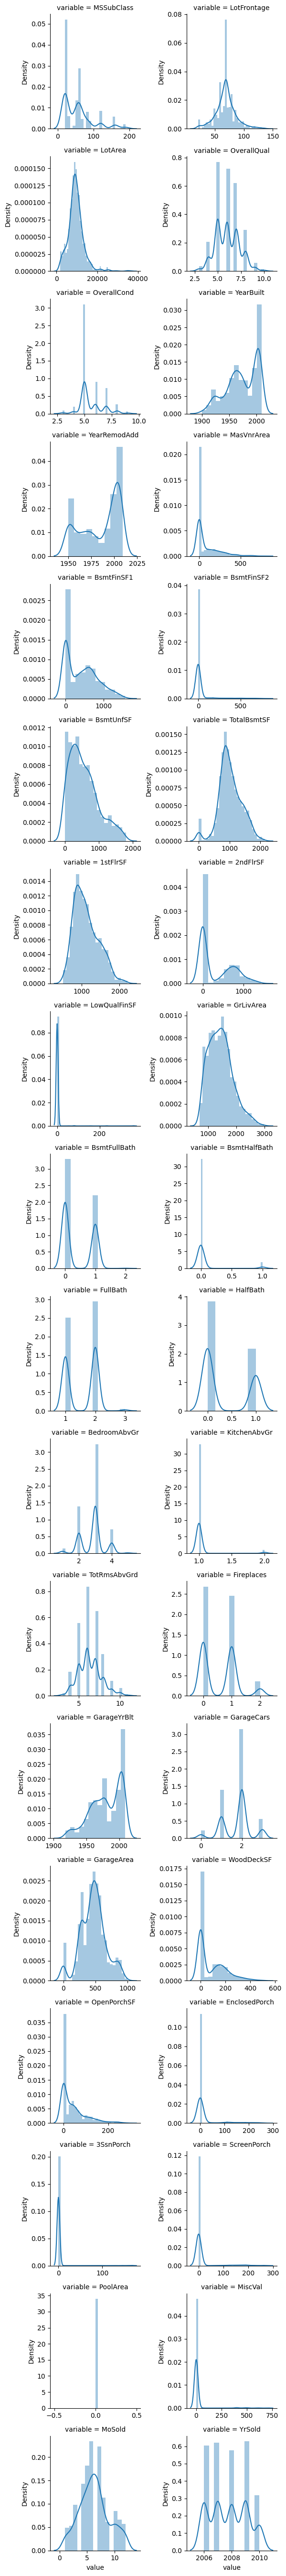

In [17]:
f = pd.melt(trim_data, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

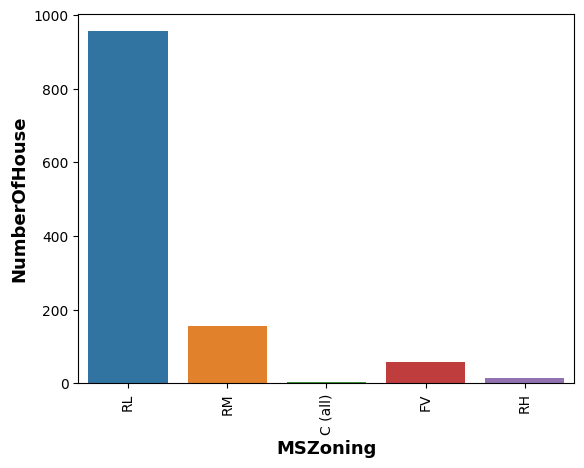

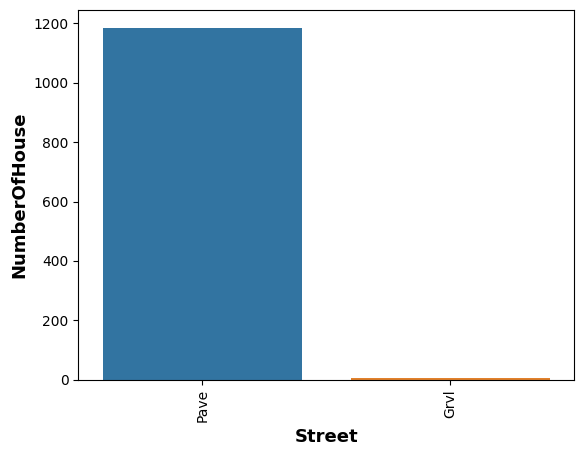

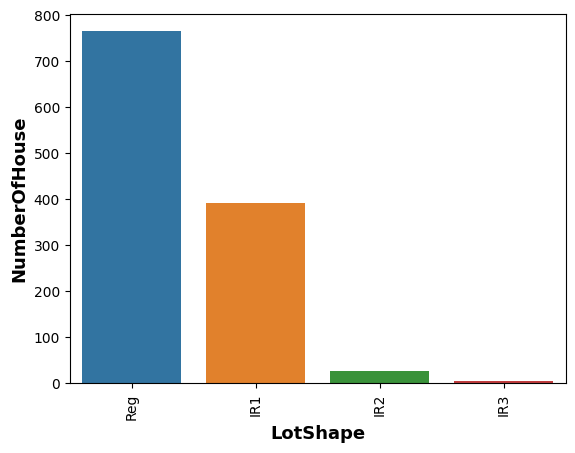

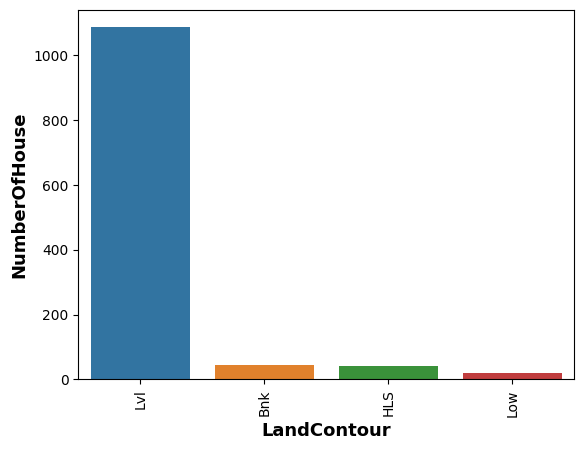

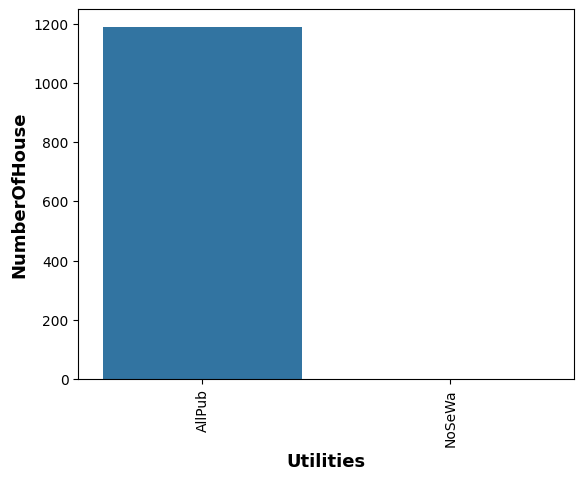

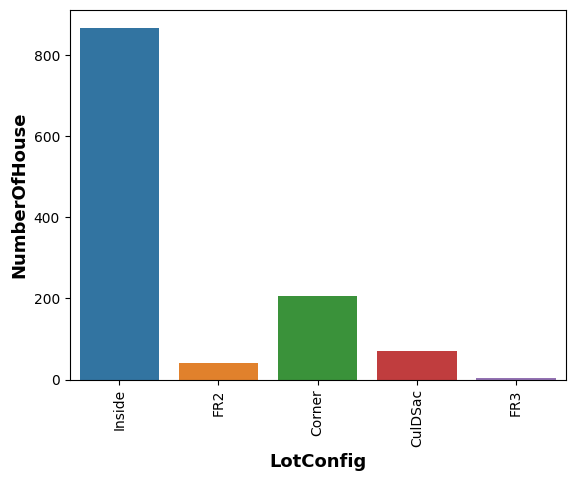

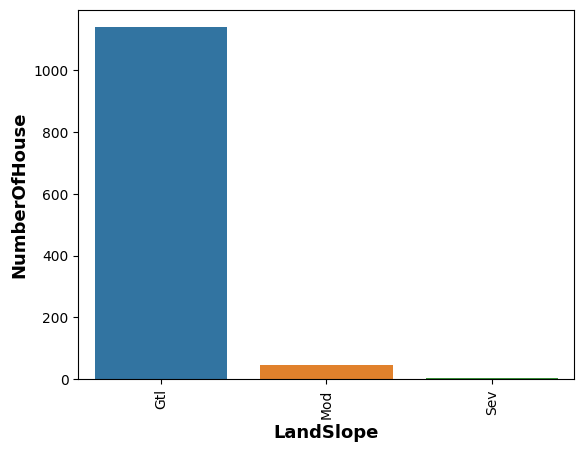

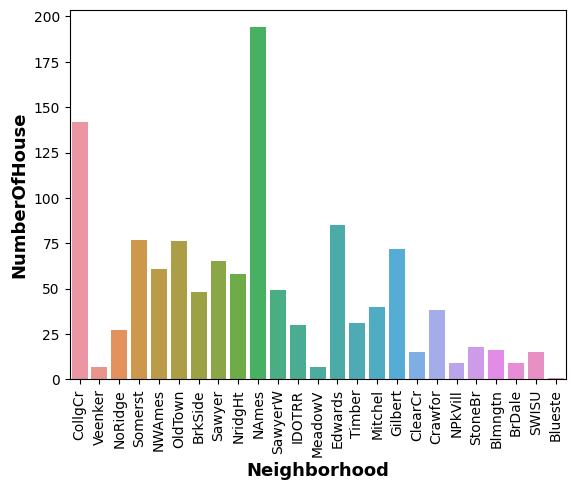

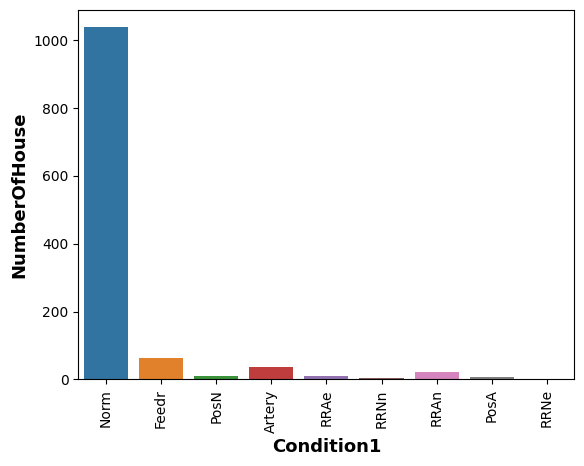

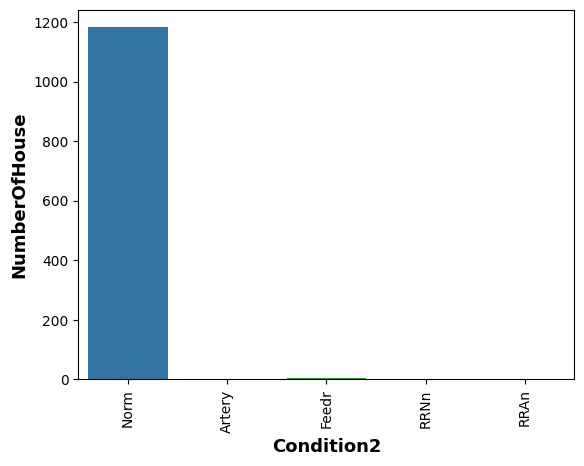

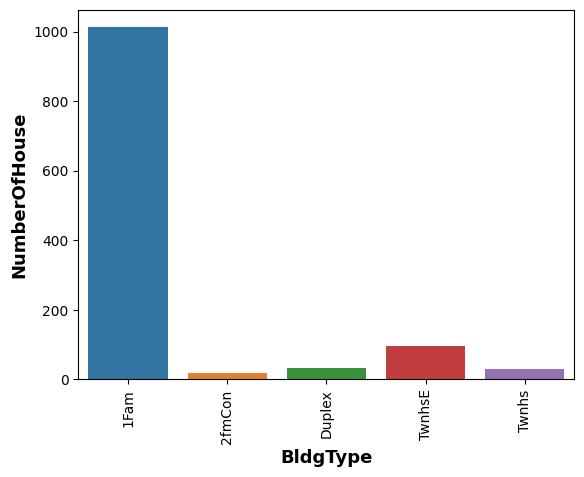

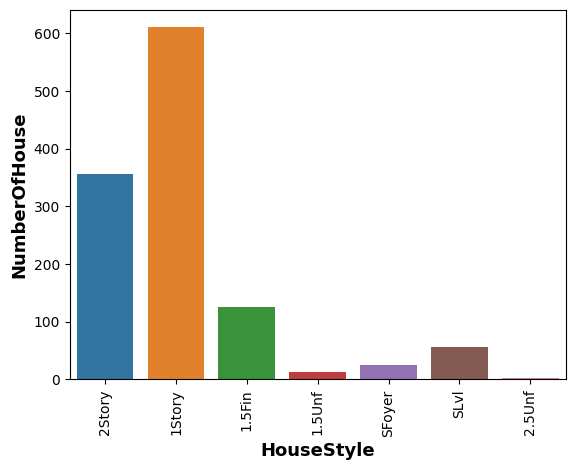

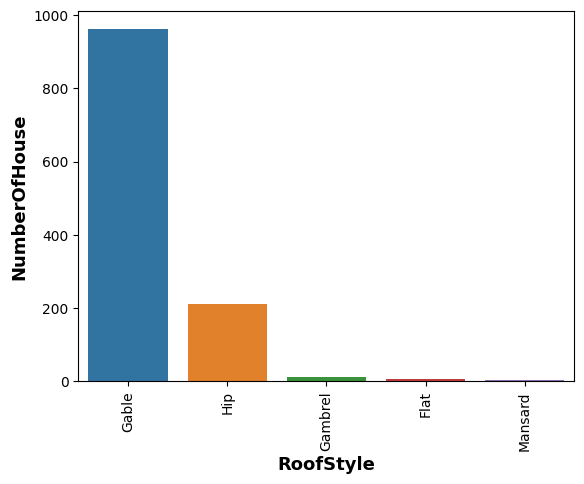

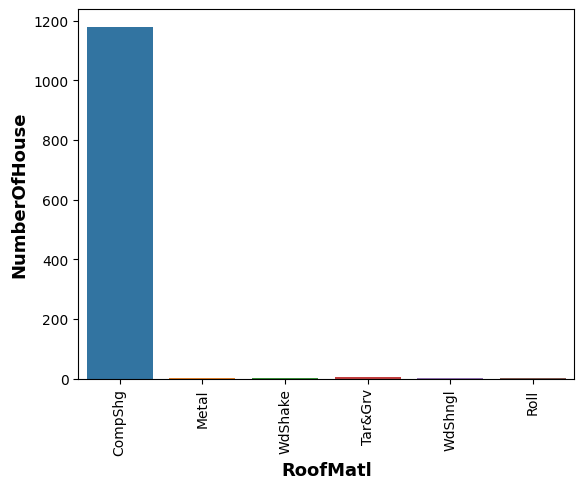

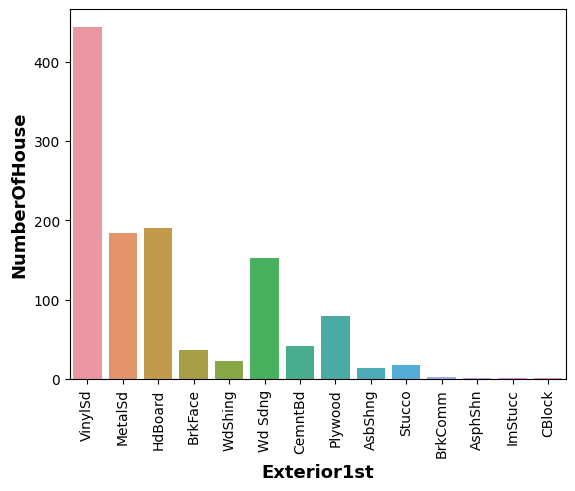

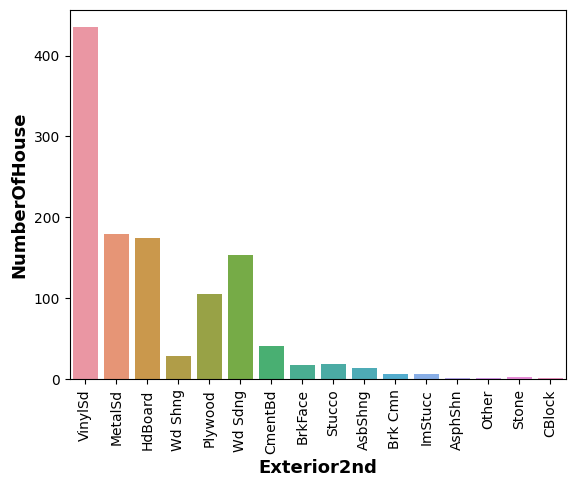

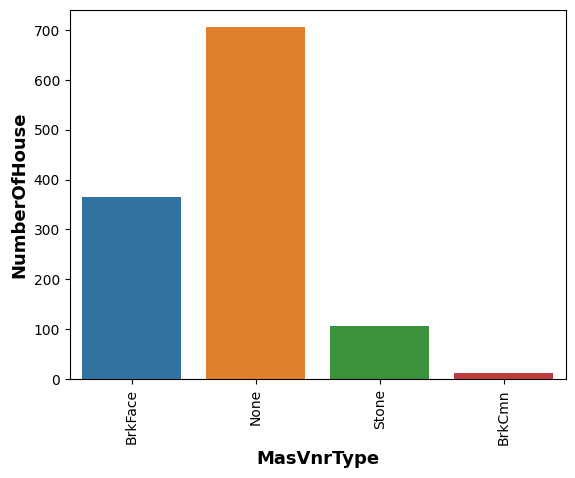

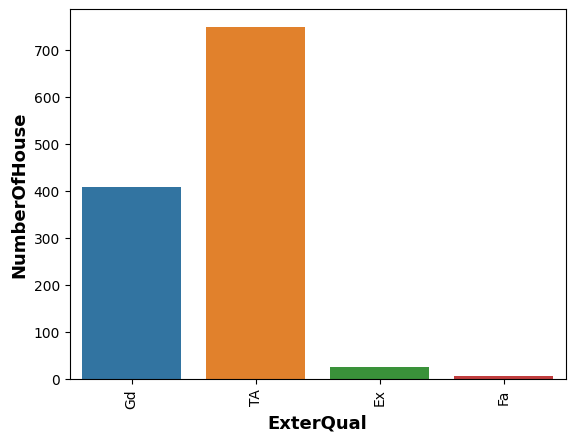

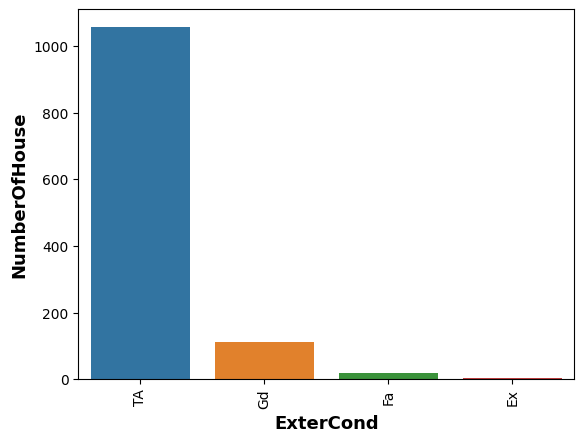

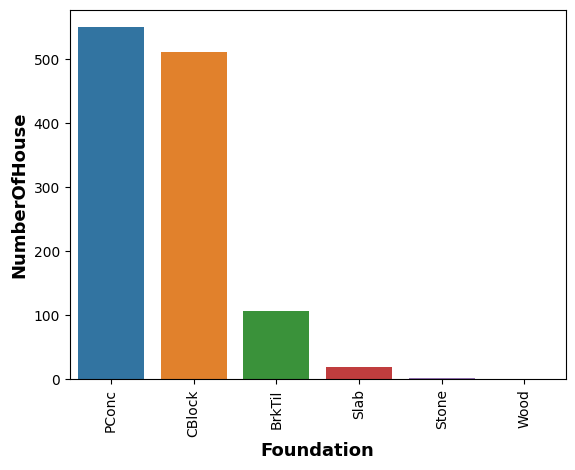

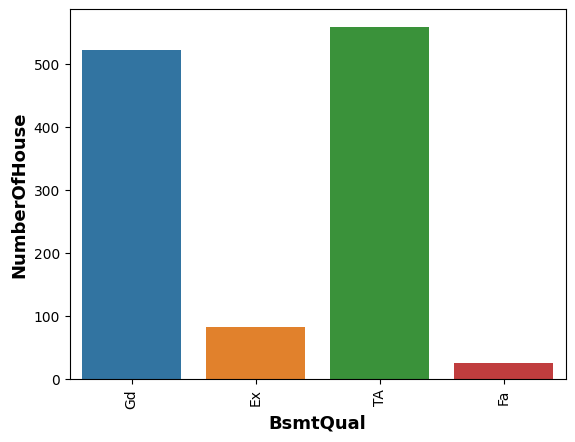

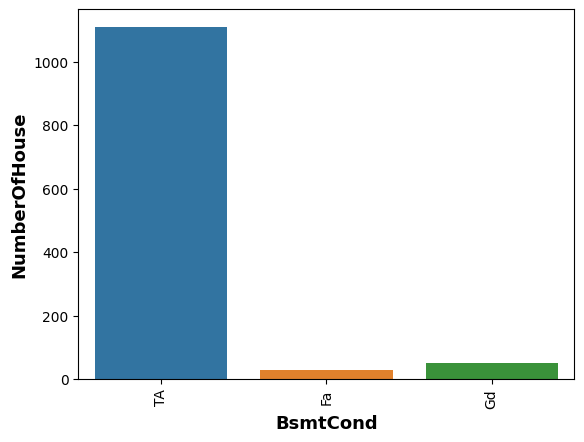

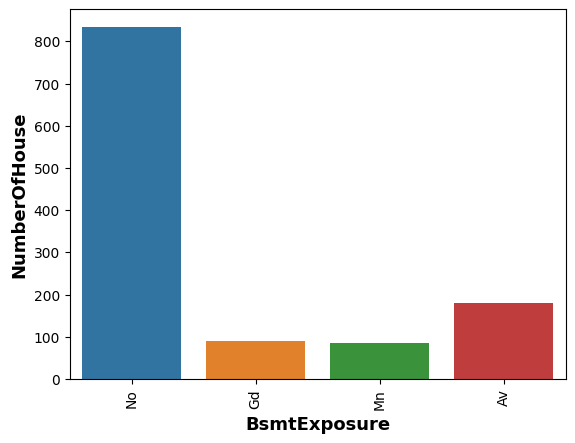

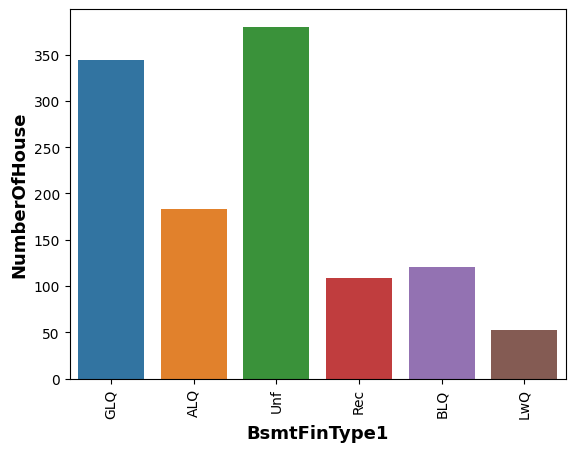

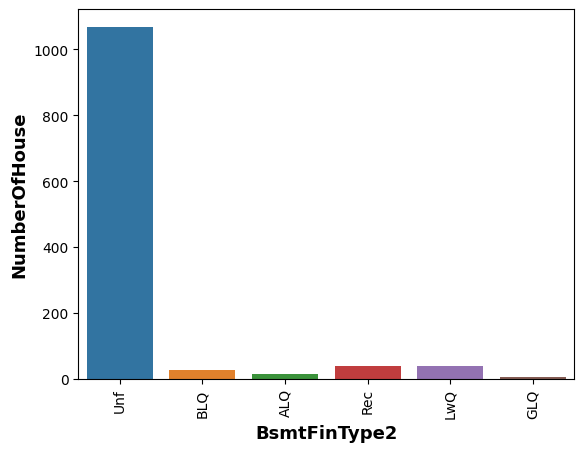

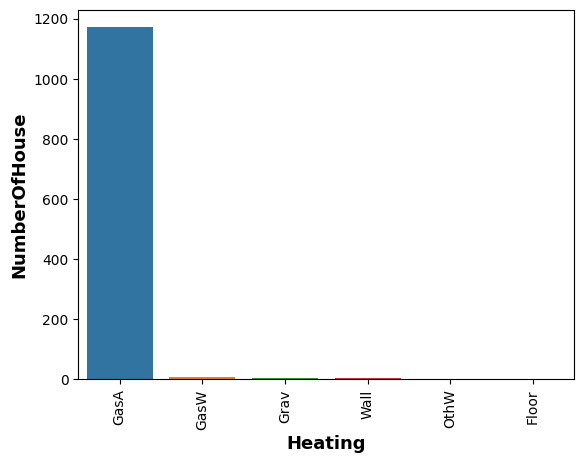

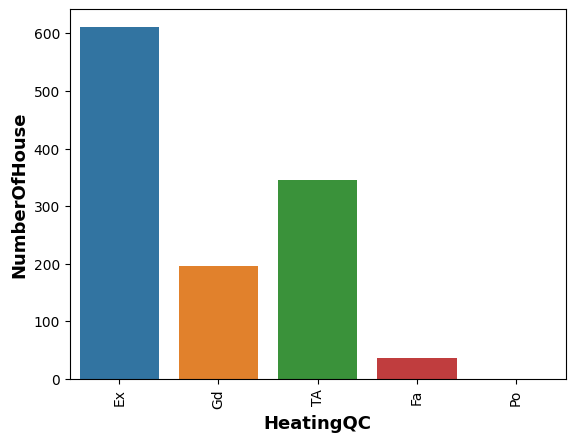

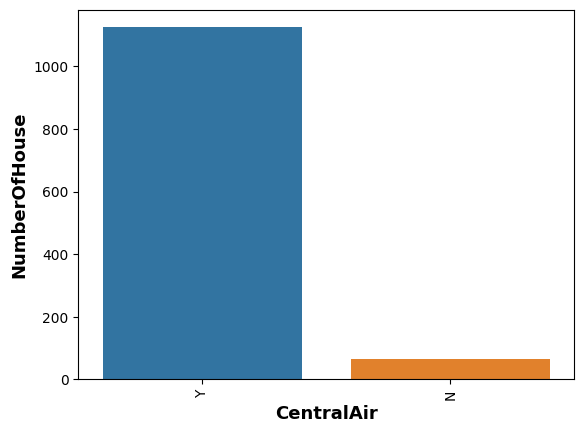

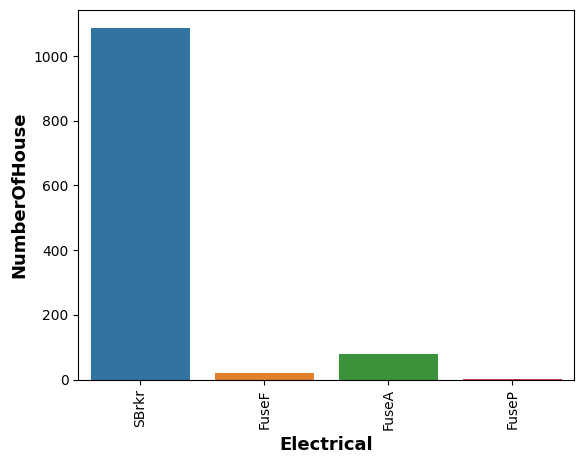

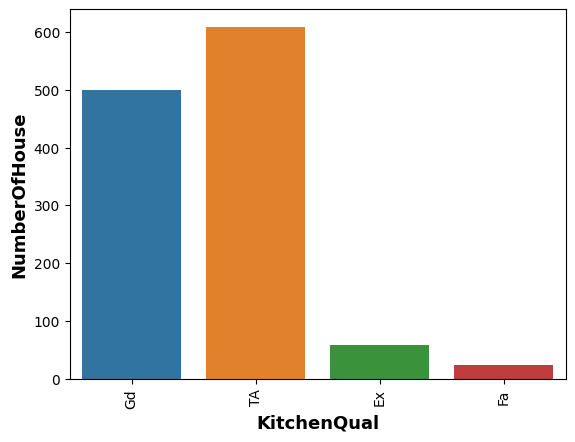

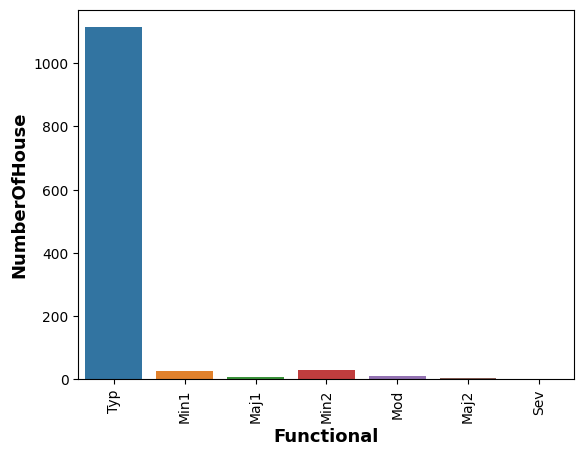

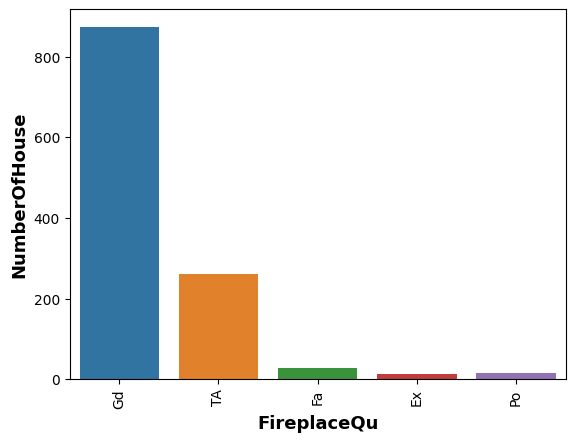

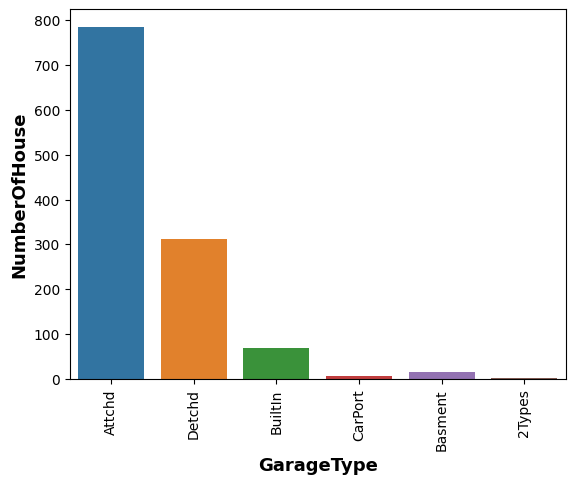

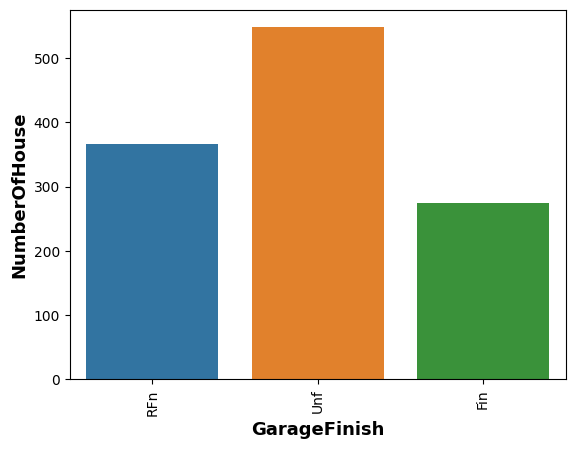

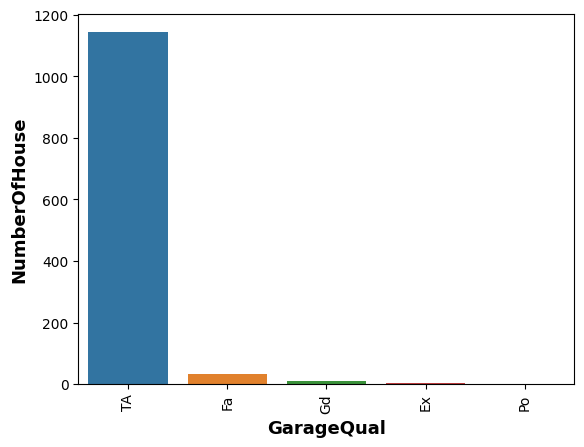

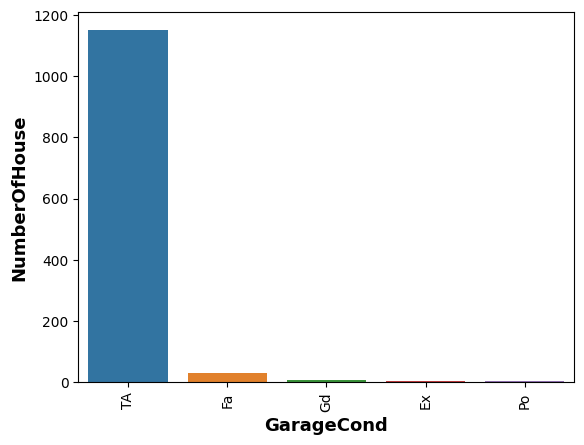

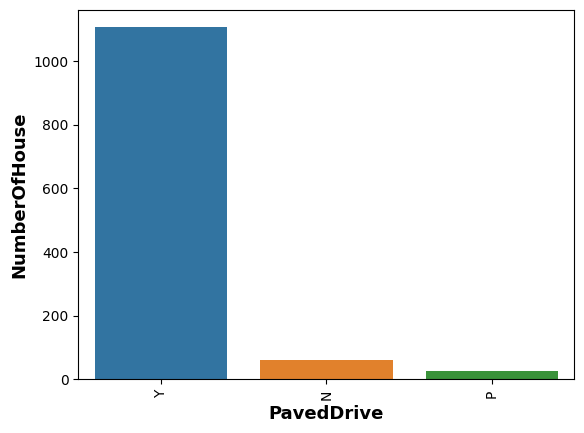

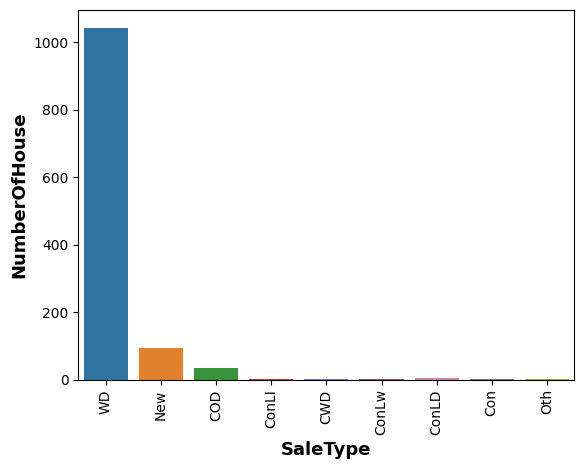

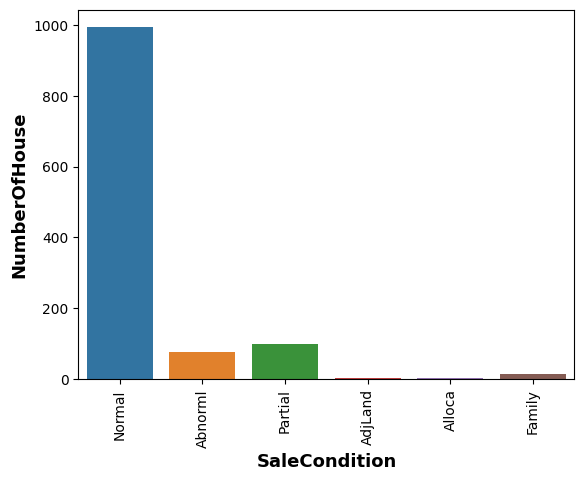

In [18]:
for col in qualitative:
    sns.countplot(x=col, data=trim_data)
    plt.xticks(rotation=90)
    plt.xlabel(col, fontsize=13, fontweight='bold')
    plt.ylabel('NumberOfHouse', fontsize=13, fontweight='bold')
    plt.show()

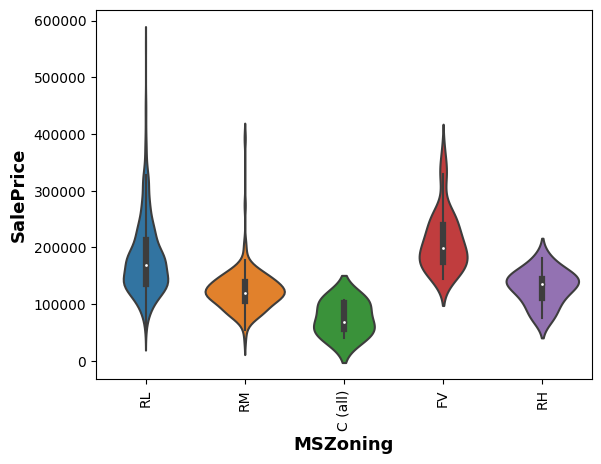

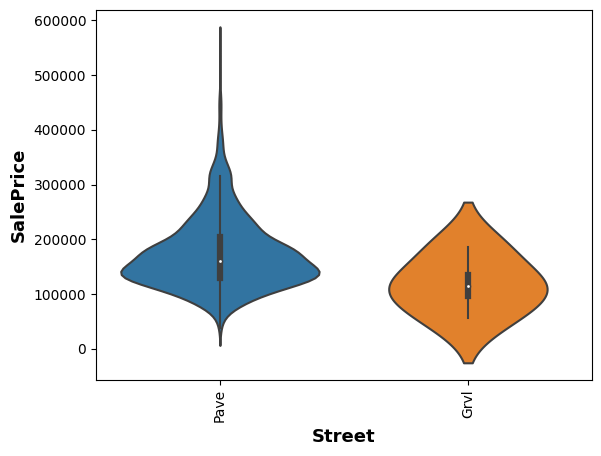

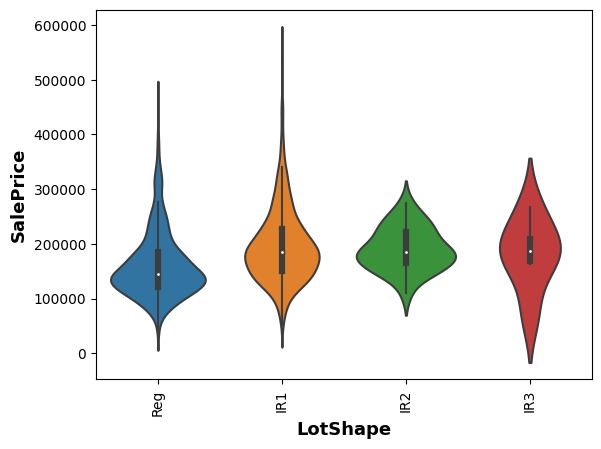

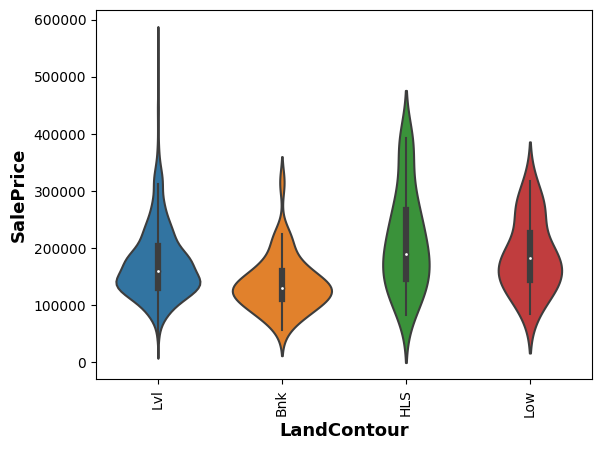

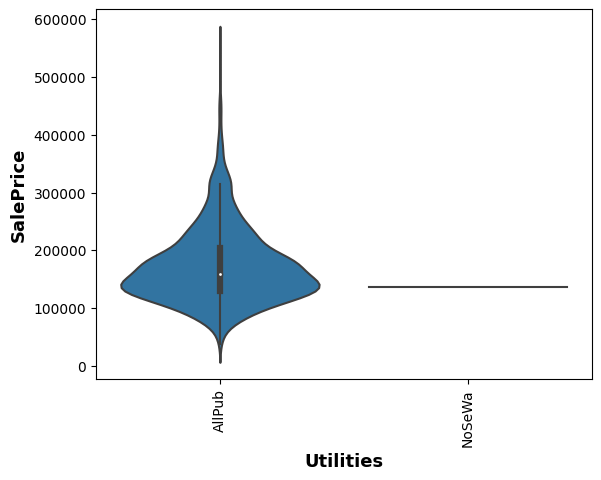

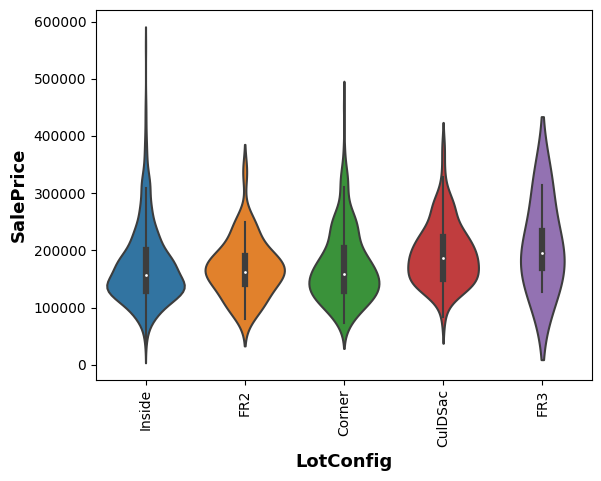

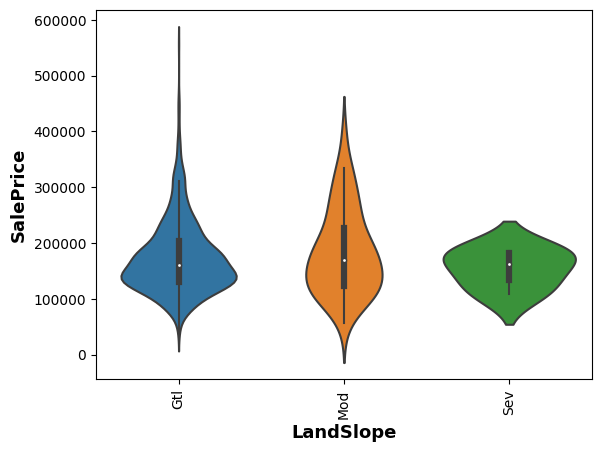

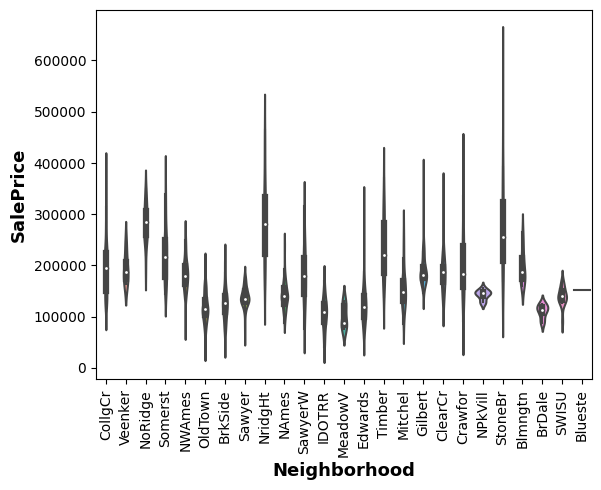

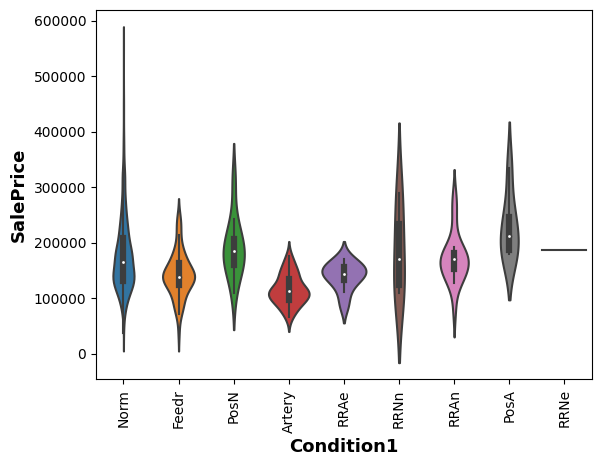

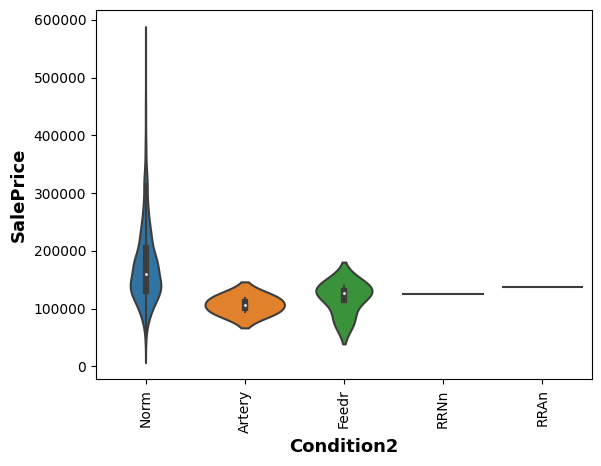

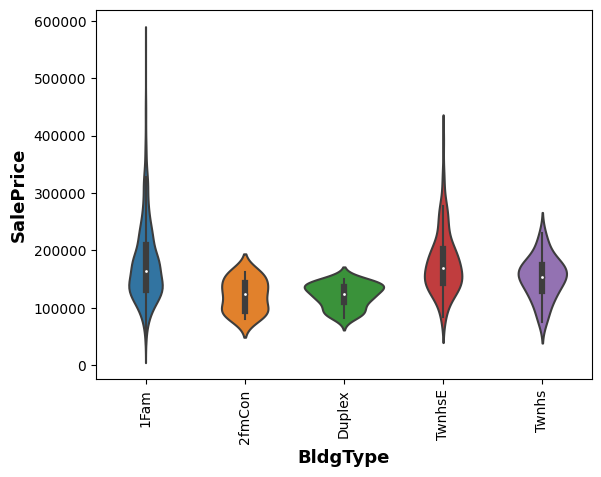

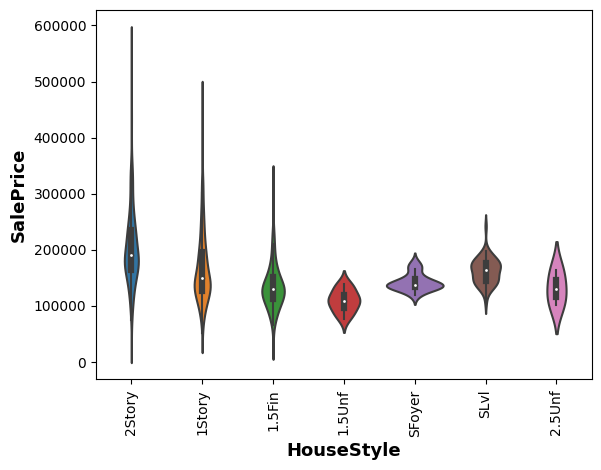

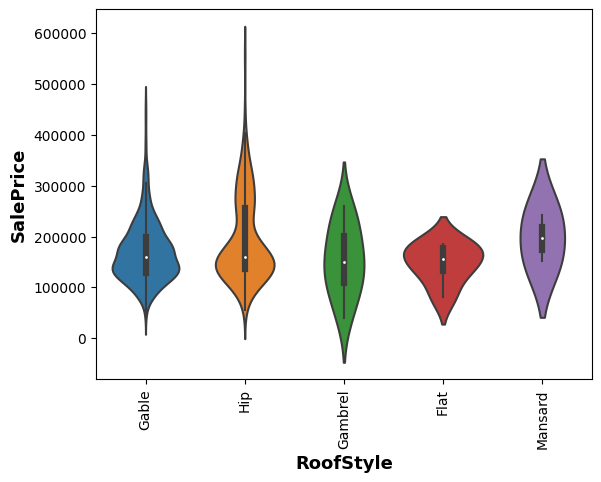

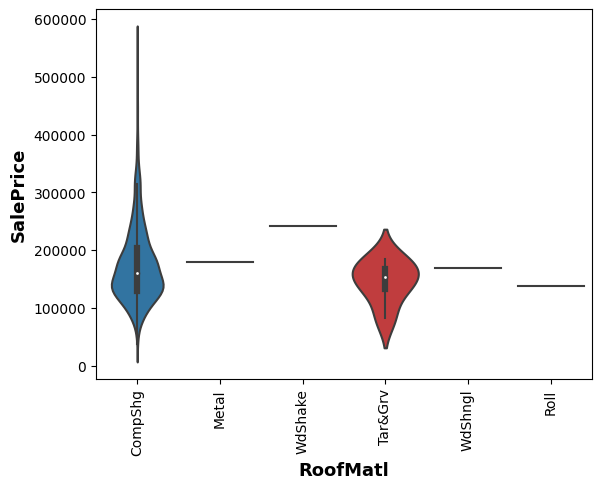

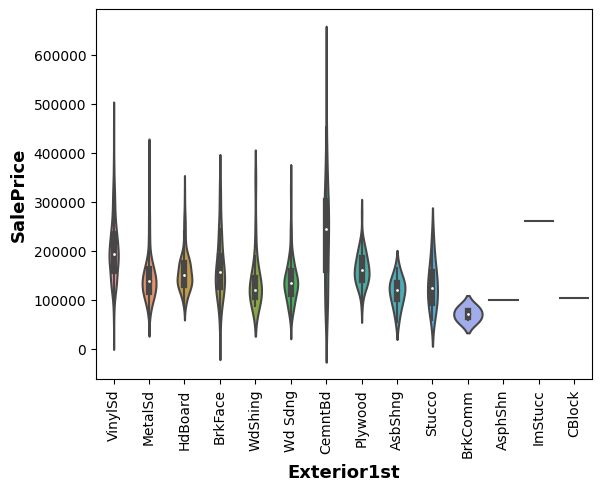

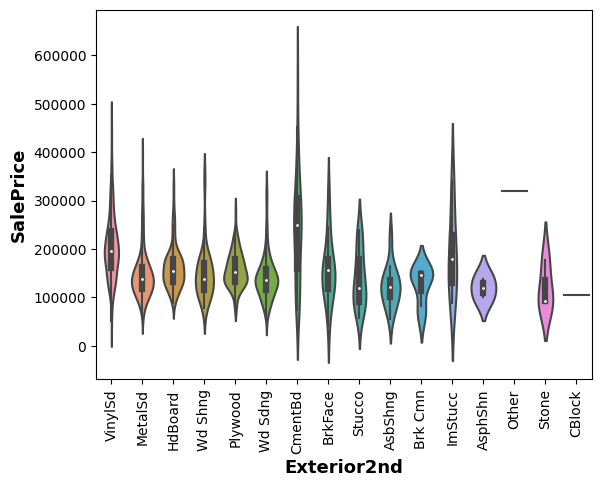

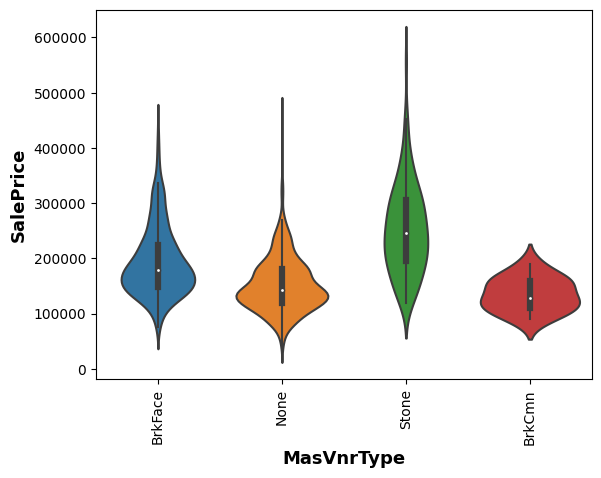

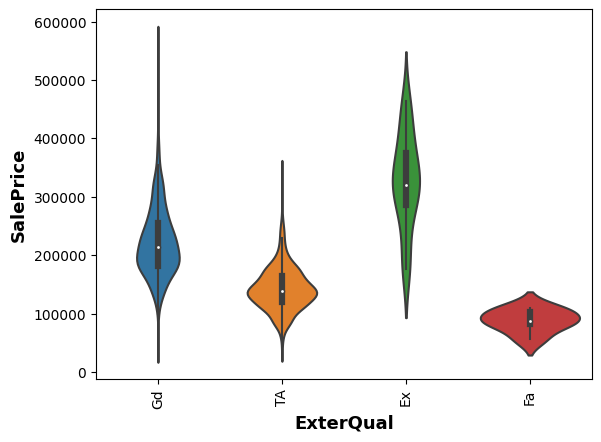

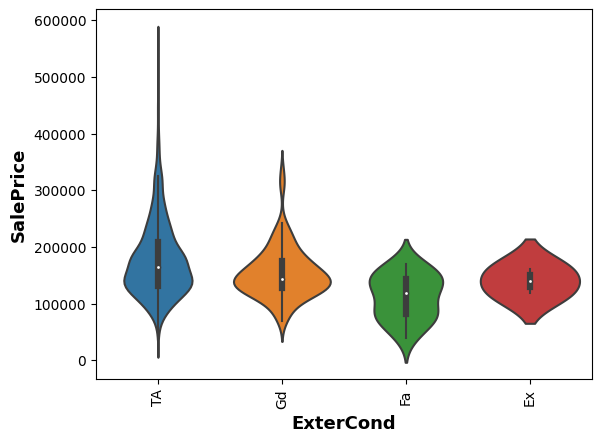

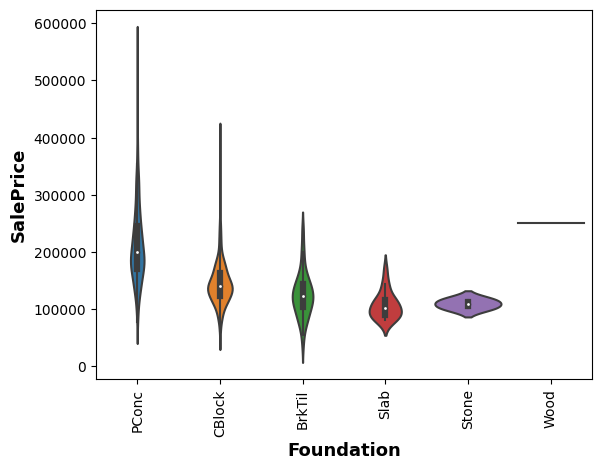

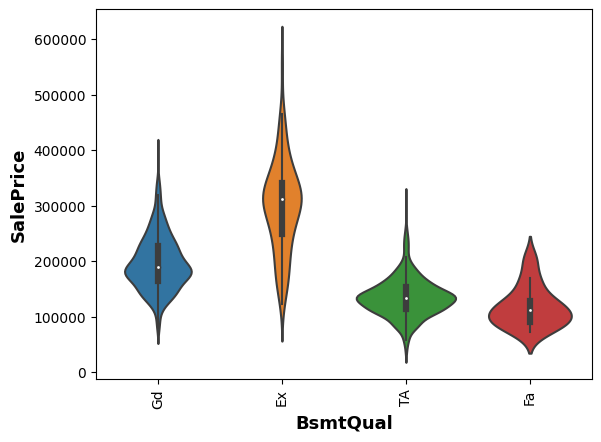

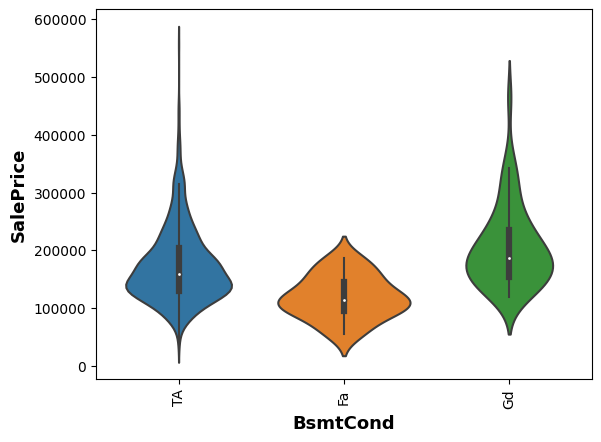

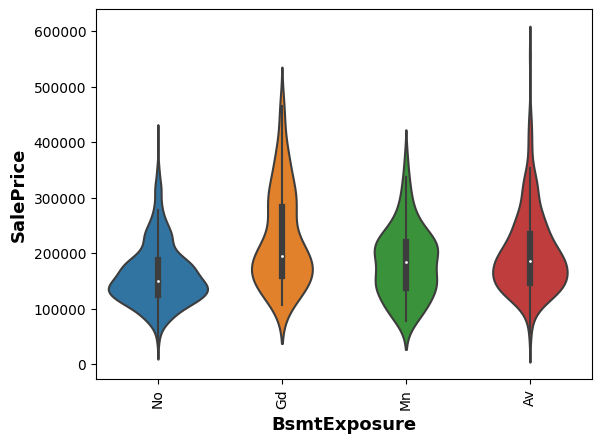

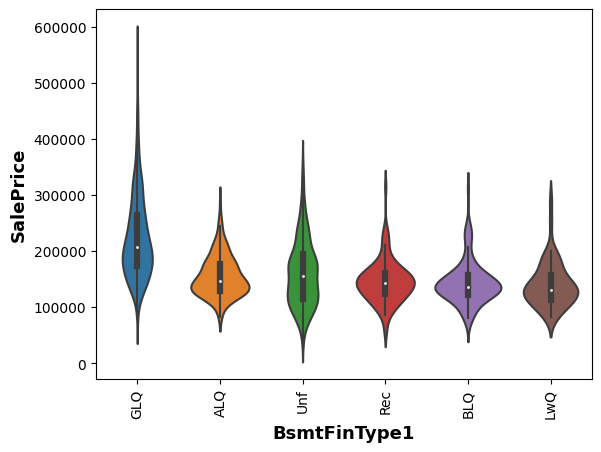

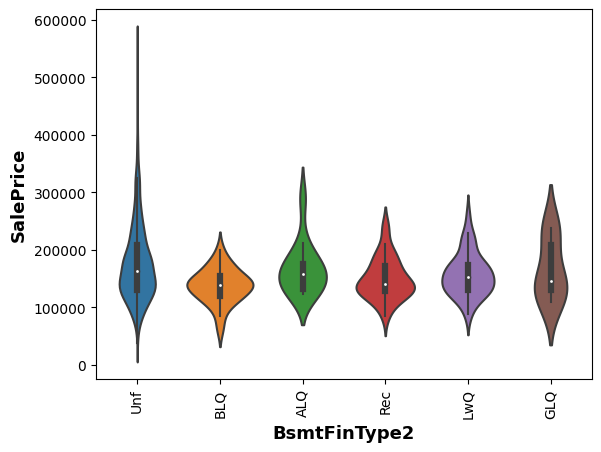

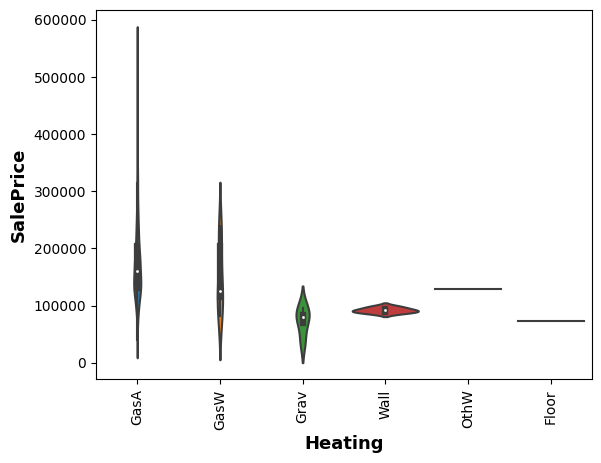

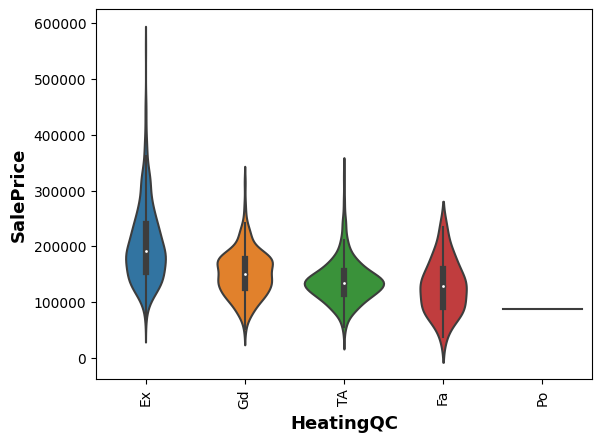

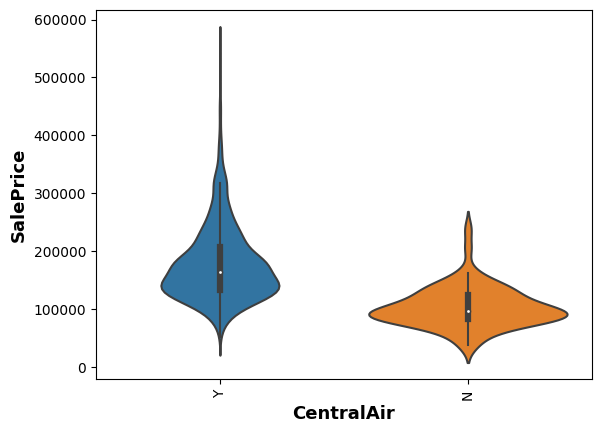

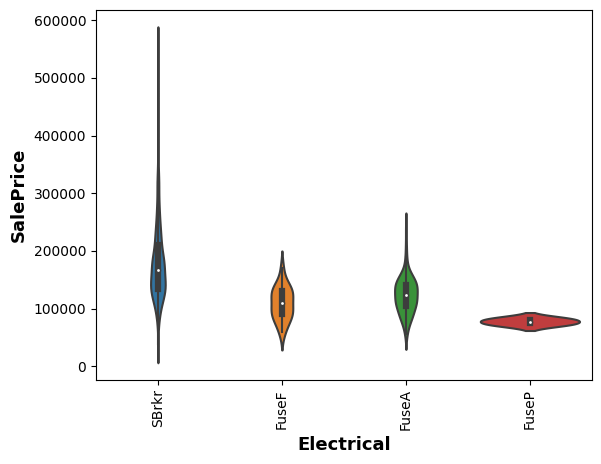

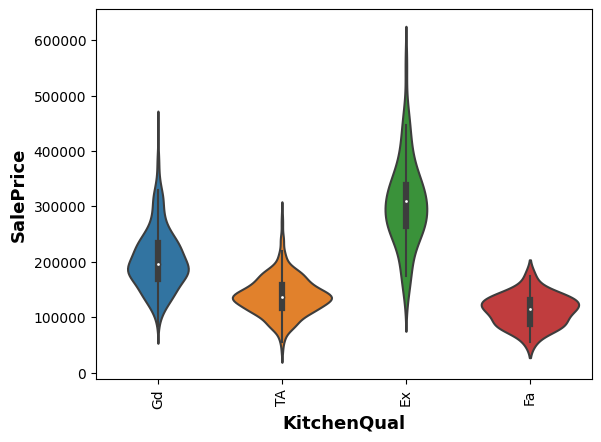

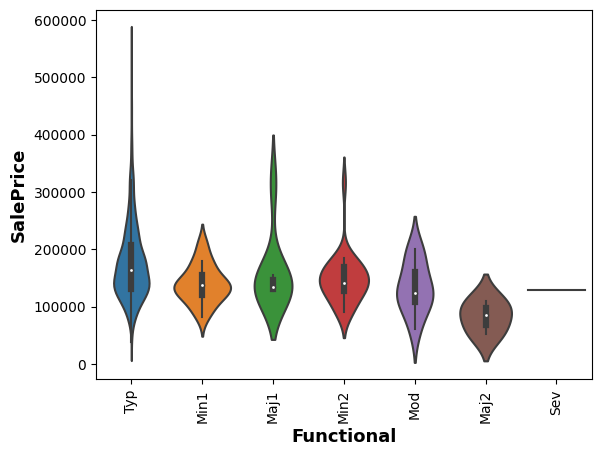

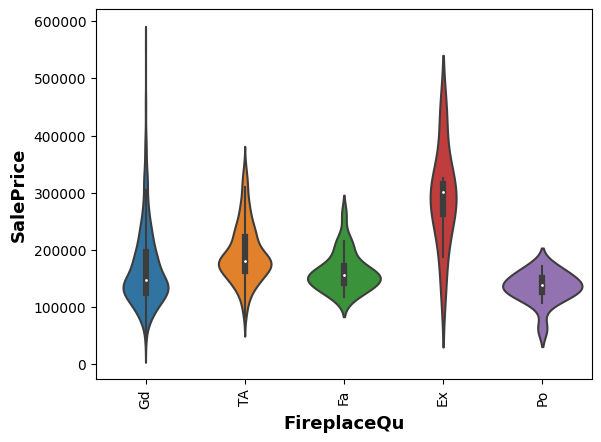

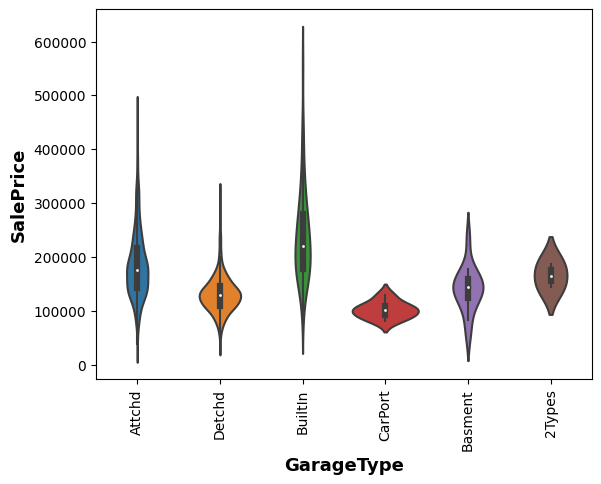

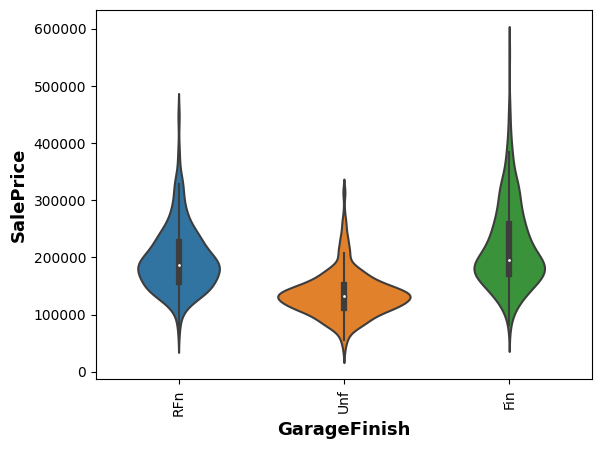

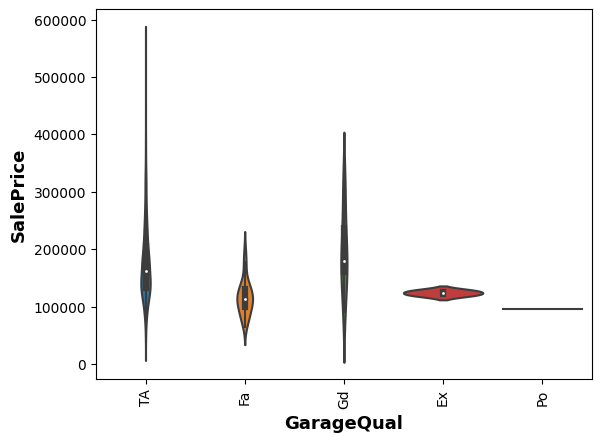

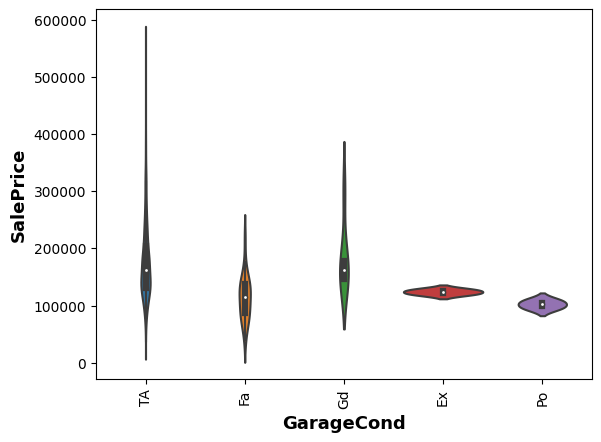

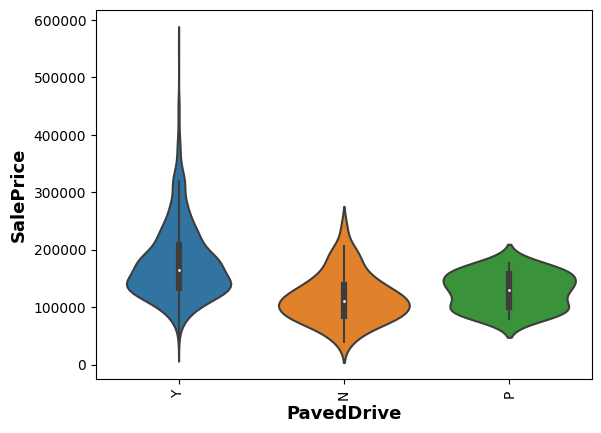

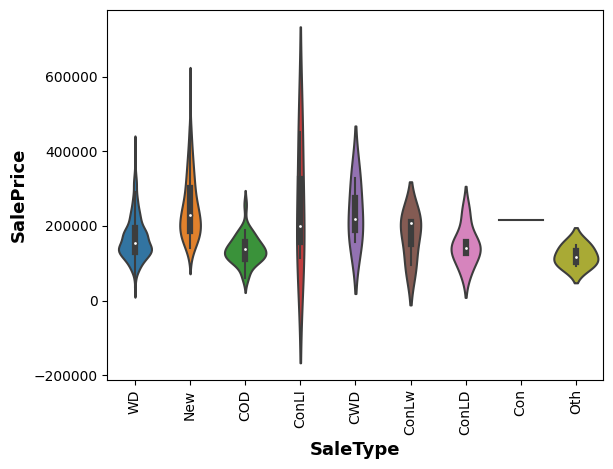

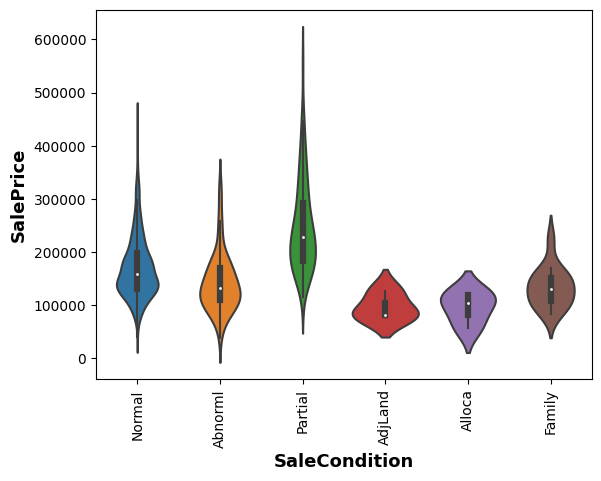

In [19]:
for col in qualitative:
    sns.violinplot(data=trim_data, x=col, y='SalePrice')
    plt.xticks(rotation=90)
    plt.xlabel(col, fontsize=13, fontweight='bold')
    plt.ylabel('SalePrice', fontsize=13, fontweight='bold')
    plt.show()

In [20]:
def encode(df, col):
    ordering = pd.DataFrame()
    ordering['val'] = df[col].unique()
    ordering.index = ordering.val
    ordering['spmean'] = df[[col, 'SalePrice']].groupby(col).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        df.loc[df[col] == cat, col+'_E'] = o
    
qual_encoded = []
for col in qualitative:  
    encode(trim_data, col)
    qual_encoded.append(col+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'SaleType_E', 'SaleCondition_E']


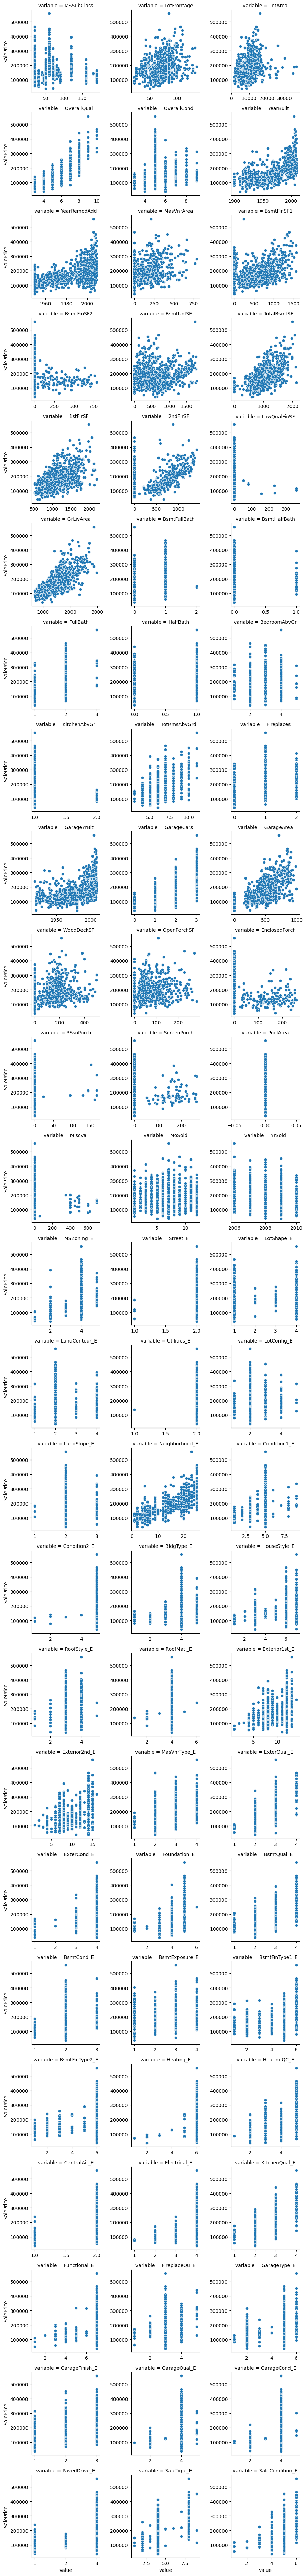

In [21]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(trim_data, id_vars=['SalePrice'], value_vars=quantitative+qual_encoded)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.scatterplot, "value", "SalePrice")

## Hypothesis Testing

In [22]:
trim_data.describe().T

count           mean           std      min        25%  \
MSSubClass       1190.0      54.890756     40.584313     20.0      20.00   
LotFrontage      1190.0      68.731092     17.734562     21.0      60.00   
LotArea          1190.0    9531.220168   3860.987872   1680.0    7500.00   
OverallQual      1190.0       6.052941      1.276581      3.0       5.00   
OverallCond      1190.0       5.566387      1.056143      3.0       5.00   
YearBuilt        1190.0    1973.289076     28.462310   1900.0    1955.00   
YearRemodAdd     1190.0    1984.876471     20.763574   1950.0    1966.00   
MasVnrArea       1190.0      88.698319    141.560707      0.0       0.00   
BsmtFinSF1       1190.0     427.036975    407.339164      0.0       0.00   
BsmtFinSF2       1190.0      34.914286    122.257959      0.0       0.00   
BsmtUnfSF        1190.0     560.888235    421.894418      0.0     235.50   
TotalBsmtSF      1190.0    1022.839496    367.149665      0.0     799.25   
1stFlrSF         1190.0    1125.343697    322.685895    520.0     866.75   
2ndFlrSF         1190.0     320.227731    406.780803      0.0       0.00   
LowQualFinSF     1190.0       1.373950     18.612027      0.0       0.00   
GrLivArea        1190.0    1446.945378    424.916798    694.0    1120.25   
BsmtFullBath     1190.0       0.403361      0.494194      0.0       0.00   
BsmtHalfBath     1190.0       0.054622      0.227336      0.0       0.00   
FullBath         1190.0       1.552101      0.514115      1.0       1.00   
HalfBath         1190.0       0.362185      0.480834      0.0       0.00   
BedroomAbvGr     1190.0       2.837815      0.692200      1.0       2.00   
KitchenAbvGr     1190.0       1.031933      0.175895      1.0       1.00   
TotRmsAbvGrd     1190.0       6.341176      1.393087      3.0       5.00   
Fireplaces       1190.0       0.575630      0.610184      0.0       0.00   
GarageYrBlt      1190.0    1979.341176     23.316188   1918.0    1962.25   
GarageCars       1190.0       1.757983      0.692565      0.0       1.00   
GarageArea       1190.0     467.889076    192.836687      0.0     336.00   
WoodDeckSF       1190.0      87.375630    110.687366      0.0       0.00   
OpenPorchSF      1190.0      43.210084     56.713595      0.0       0.00   
EnclosedPorch    1190.0      19.345378     54.184101      0.0       0.00   
3SsnPorch        1190.0       1.139496     12.998572      0.0       0.00   
ScreenPorch      1190.0      11.632773     44.492414      0.0       0.00   
PoolArea         1190.0       0.000000      0.000000      0.0       0.00   
MiscVal          1190.0      11.583193     75.990534      0.0       0.00   
MoSold           1190.0       6.314286      2.692302      1.0       4.00   
YrSold           1190.0    2007.794958      1.325803   2006.0    2007.00   
SalePrice        1190.0  173750.945378  64742.107792  37900.0  130000.00   
MSZoning_E       1190.0       3.760504      0.754434      1.0       4.00   
Street_E         1190.0       1.996639      0.057904      1.0       2.00   
LotShape_E       1190.0       2.038655      1.408320      1.0       1.00   
LandContour_E    1190.0       2.049580      0.434116      1.0       2.00   
Utilities_E      1190.0       1.999160      0.028989      1.0       2.00   
LotConfig_E      1190.0       2.265546      0.635432      1.0       2.00   
LandSlope_E      1190.0       2.036975      0.205830      1.0       2.00   
Neighborhood_E   1190.0      13.073109      6.772566      1.0       7.00   
Condition1_E     1190.0       4.781513      0.957109      1.0       5.00   
Condition2_E     1190.0       4.980672      0.247027      1.0       5.00   
BldgType_E       1190.0       3.950420      0.598621      1.0       4.00   
HouseStyle_E     1190.0       5.826891      1.291865      1.0       6.00   
RoofStyle_E      1190.0       3.161345      0.431148      1.0       3.00   
RoofMatl_E       1190.0       3.989076      0.180780      1.0       4.00   
Exterior1st_E    1190.0       9.782353      2.254354      1.0     

#### Q1: Average of SalePrice is 175000 (one sample T-test)

$$
\begin{align}
H_{0} : \mu = 175000\\
H_{1} : \mu \neq 175000
\end{align}
$$

In [23]:
alpha = 0.05 
stat, p_value = stats.ttest_1samp(trim_data['SalePrice'], popmean=175000)

print('stat : {} , p_value : {}'.format(stat, p_value))
if p_value > alpha:
    print("accept null hypothesis")
else:
    print("reject null hypothesis")

stat : -0.6655306743202828 , p_value : 0.5058402122658516
accept null hypothesis


#### Q2: Average of SalePrice in Pave street and Grvl street is equal (2 sample independent t-test)

$$
\begin{align}
H_{0} : \mu_{Pave} = \mu_{Grvl} \xrightarrow{} \mu_{Pave} - \mu_{Grvl} = 0\\
H_{1} : \mu_{Pave} \neq \mu_{Grvl} \xrightarrow{} \mu_{Pave} - \mu_{Grvl} \neq 0
\end{align}
$$

In [24]:
pave = trim_data[trim_data['Street'] == 'Pave']
grvl = trim_data[trim_data['Street'] == 'Grvl']

In [25]:
alpha = 0.05 
stat, p_value = stats.ttest_ind(pave['SalePrice'], grvl['SalePrice'], equal_var=True, alternative='two-sided')

print('stat : {} , p_value : {}'.format(stat, p_value))
if p_value > alpha:
    print("accept null hypothesis")
else:
    print("reject null hypothesis")

stat : 1.7328491894002367 , p_value : 0.0833819803056612
accept null hypothesis


#### Q3: Roof Style effects on SalePrice (ANOVA)

$$
\begin{align}
H_{0} : \mu_{Gable} = \mu_{Flat} = \mu_{Mansard} \\
H_{1} : \mu_{Gable} \neq \mu_{Flat} \neq \mu_{Mansard}
\end{align}
$$

In [26]:
gable = trim_data[trim_data['RoofStyle'] == 'Gable']
flat = trim_data[trim_data['RoofStyle'] == 'Flat']
mansard = trim_data[trim_data['RoofStyle'] == 'Mansard']

In [27]:
alpha = 0.05 
stat, p_value = stats.f_oneway(gable['SalePrice'], flat['SalePrice'], mansard['SalePrice'])

print('stat : {} , p_value : {}'.format(stat, p_value))
if p_value > alpha:
    print("accept null hypothesis")
else:
    print("reject null hypothesis")

stat : 0.6280636020684639 , p_value : 0.5338416446715328
accept null hypothesis


#### Q4: Street as categorical feature and RoofStyle as categorical feature (chi2 Test)

In [28]:
contingency_table = pd.crosstab(trim_data['Street'], trim_data['RoofStyle'])
print('contingency_table : \n', contingency_table)

contingency_table : 
 RoofStyle  Flat  Gable  Gambrel  Hip  Mansard
Street                                       
Grvl          0      2        0    2        0
Pave          6    960       10  208        2


In [29]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table.values)
print('chi2 stat : {} , p_value : {}'.format(chi2_stat, p_value))
print('dof : ',dof)

chi2 stat : 2.913466066923064 , p_value : 0.5724095190820522
dof :  4


In [30]:
alpha = 0.05

if p_value > alpha:
    print("Retain H0,There is no relationship between 2 categorical variables")
else:
    print("Reject H0,There is a relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables


#### Q5: Pearson and Spearman Correlation between Numerical Features + Encoded Features and Target (SalePrice)

In [31]:
for feat in quantitative + qual_encoded:
    corr, p_value = stats.pearsonr(trim_data[feat], trim_data['SalePrice'])
    print(f'Parametric Pearson Corr Test Between {feat} and SalePrice: corr = {corr:.4f} , p_value = {p_value:.4f}')

    corr, p_value = stats.spearmanr(trim_data[feat], trim_data['SalePrice'])
    print(f'Non-Parametric Spearman Corr Test Between {feat} and SalePrice: corr = {corr:.4f} , p_value = {p_value:.4f}')
    print()

Parametric Pearson Corr Test Between MSSubClass and SalePrice: corr = -0.0322 , p_value = 0.2670
Non-Parametric Spearman Corr Test Between MSSubClass and SalePrice: corr = 0.0719 , p_value = 0.0131

Parametric Pearson Corr Test Between LotFrontage and SalePrice: corr = 0.3390 , p_value = 0.0000
Non-Parametric Spearman Corr Test Between LotFrontage and SalePrice: corr = 0.3411 , p_value = 0.0000

Parametric Pearson Corr Test Between LotArea and SalePrice: corr = 0.3035 , p_value = 0.0000
Non-Parametric Spearman Corr Test Between LotArea and SalePrice: corr = 0.3812 , p_value = 0.0000

Parametric Pearson Corr Test Between OverallQual and SalePrice: corr = 0.8041 , p_value = 0.0000
Non-Parametric Spearman Corr Test Between OverallQual and SalePrice: corr = 0.8082 , p_value = 0.0000

Parametric Pearson Corr Test Between OverallCond and SalePrice: corr = -0.1353 , p_value = 0.0000
Non-Parametric Spearman Corr Test Between OverallCond and SalePrice: corr = -0.1778 , p_value = 0.0000

Paramet

#### Q6: What are The building class and why it is important?

$$
\begin{align}
H_{0} : \mu_{Range1} = \mu_{Range2} = \mu_{Range3} \\
H_{1} : \mu_{Range1} \neq \mu_{Range2} \neq \mu_{Range3}
\end{align}
$$

In [44]:
sorted_class = sorted(trim_data['MSSubClass'].unique())

In [45]:
sorted_class

[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190]

In [33]:
range_1 = trim_data[trim_data['MSSubClass'].isin(sorted_class[:5])]
range_2 = trim_data[trim_data['MSSubClass'].isin(sorted_class[5:10])]
range_3 = trim_data[trim_data['MSSubClass'].isin(sorted_class[10:])]

In [34]:
alpha = 0.05 
stat, p_value = stats.f_oneway(range_1['SalePrice'], range_2['SalePrice'], range_3['SalePrice'])

print('stat : {} , p_value : {}'.format(stat, p_value))
if p_value > alpha:
    print("accept null hypothesis")
else:
    print("reject null hypothesis")

stat : 72.67270433905719 , p_value : 1.6842761252428167e-30
reject null hypothesis


#### Q7: How does the overall quality (OverallQual) of a house relate to its sale price?

$$
\begin{align}
H_{0} : \mu_{Range1} = \mu_{Range2} \xrightarrow{} \mu_{Range1} - \mu_{Range2} = 0\\
H_{1} : \mu_{Range1} \neq \mu_{Range2} \xrightarrow{} \mu_{Range1} - \mu_{Range2} \neq 0
\end{align}
$$

In [35]:
sorted_ove = sorted(trim_data['OverallQual'].unique())

In [36]:
range_1 = trim_data[trim_data['OverallQual'].isin(sorted_ove[:4])]
range_2 = trim_data[trim_data['OverallQual'].isin(sorted_ove[4:8])]

In [37]:
alpha = 0.05 
stat, p_value = stats.ttest_ind(range_1['SalePrice'], range_2['SalePrice'], equal_var=True, alternative='two-sided')

print('stat : {} , p_value : {}'.format(stat, p_value))
if p_value > alpha:
    print("accept null hypothesis")
else:
    print("reject null hypothesis")

stat : -32.387583625805036 , p_value : 1.8748769886185255e-165
reject null hypothesis


#### Q8: How do the different types of heating (Heating) affect the sale prices?

$$
\begin{align}
H_{0} : \mu_{GasA} = \mu_{GasW} = \mu_{Grav} = \mu_{Wall} = \mu_{OthW} = \mu_{Floor}\\
H_{1} : \mu_{GasA} \neq \mu_{GasW} \neq \mu_{Grav} \neq \mu_{Wall} \neq \mu_{OthW} \neq \mu_{Floor}
\end{align}
$$

In [38]:
trim_data['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [39]:
gasa = trim_data[trim_data['Heating'] == 'GasA']
gasw = trim_data[trim_data['Heating'] == 'GasW']
grav = trim_data[trim_data['Heating'] == 'Grav']
wall = trim_data[trim_data['Heating'] == 'Wall']
othw = trim_data[trim_data['Heating'] == 'OthW']
floor = trim_data[trim_data['Heating'] == 'Floor']

In [40]:
alpha = 0.05 
stat, p_value = stats.f_oneway(gasa['SalePrice'], gasw['SalePrice'], grav['SalePrice'], wall['SalePrice'], othw['SalePrice'], floor['SalePrice'])

print('stat : {} , p_value : {}'.format(stat, p_value))
if p_value > alpha:
    print("accept null hypothesis")
else:
    print("reject null hypothesis")

stat : 4.157931191145648 , p_value : 0.0009491527634660076
reject null hypothesis


#### Q9: How do the different types of utilities (Utilities) available in a property relate to sale prices?

$$
\begin{align}
H_{0} : \mu_{AllPub} = \mu_{NoSeWa} \xrightarrow{} \mu_{AllPub} - \mu_{NoSeWa} = 0\\
H_{1} : \mu_{AllPub} \neq \mu_{NoSeWa} \xrightarrow{} \mu_{AllPub} - \mu_{NoSeWa} \neq 0
\end{align}
$$

In [41]:
trim_data['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [42]:
allpub = trim_data[trim_data['Utilities'] == 'AllPub']
nosewa = trim_data[trim_data['Utilities'] == 'NoSeWa']

In [43]:
alpha = 0.05 
stat, p_value = stats.f_oneway(allpub['SalePrice'], nosewa['SalePrice'])

print('stat : {} , p_value : {}'.format(stat, p_value))
if p_value > alpha:
    print("accept null hypothesis")
else:
    print("reject null hypothesis")

stat : 0.31360236221357635 , p_value : 0.5755835736799058
accept null hypothesis
